# Läs in kommundata

In [1]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Krokom har id 2309 och har som senast totalt 14759 människor som bodde i kommunen. Snittåldern är 44 år, samt hade år 2017 en befolkningstäthet på: 2 människor/km^2


# Läs in bankomatdata

In [2]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 106701, som finns på addressen Storgatan 67-78, i Solna kommun. Det finns 10 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2014M01', 'antalTransaktioner': 10617, 'omsättning': 9590800}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

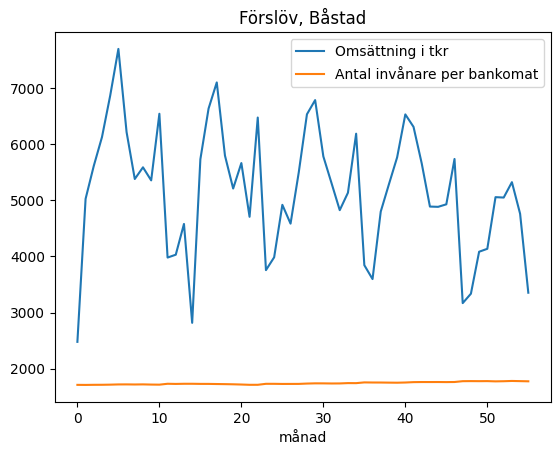

In [3]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

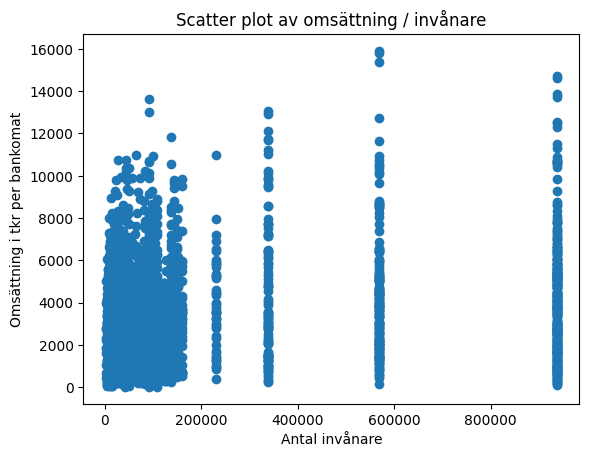

In [4]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

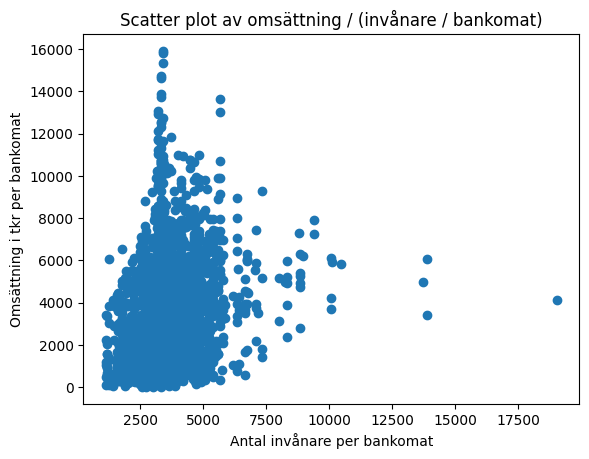

In [5]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)

Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Bengtsfors 1444.6974543816175 sek/capita 10.5
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
Krokom 374.59672064503013 sek/capita 2.5
Bjurholm 1465.5822616407982 sek/capita 1.8
Arvidsjaur 1562.0885363357215 sek/capita 1.1


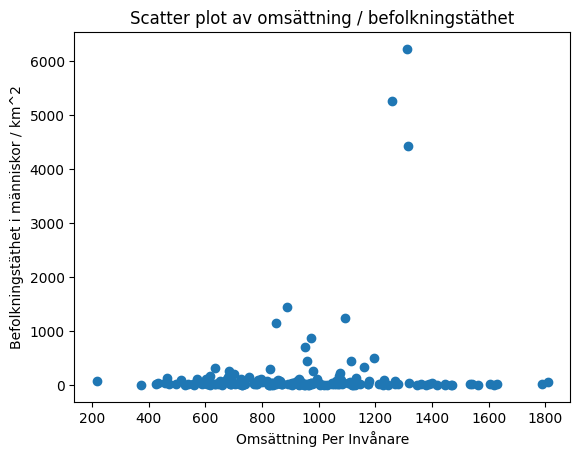

In [6]:
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()

In [13]:
from collections import defaultdict
import pandas as pd

month = "2022M01"
year = int(month[0:4])

dataDict = defaultdict(dict)

for kommun in data.kommuner:
    try:
        namn = kommun.namn
        befolkning = kommun.data[month]["total"]
        totalOmsättning = kommun.totalOmsättning
        omsättningPerInvånare = kommun.omsättningPerInvånare
        antalBankomater = kommun.antalBankomater
        befolkningstäthet = kommun.befolkningstätheter[year]
        snittÅlder = kommun.snittÅlder
        antalTransaktioner = kommun.totalTransaktionsAntal
        antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
        genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal

        dataDict[namn] = {
            "Befolkning": befolkning,
            "Total Omsättning": totalOmsättning,
            "Omsättning per Invånare": omsättningPerInvånare,
            "Antal Bankomater": antalBankomater,
            "Befolknigstäthet": befolkningstäthet,
            "Genomsnittlig Ålder": snittÅlder,
            "Antal Transaktioner": antalTransaktioner,
            "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
            "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek
        } 
    except: 
        pass


df = pd.DataFrame(dataDict)

print(df)


Empty DataFrame
Columns: []
Index: []
